In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import swifter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
cd /Users/rabarry/Documents/Insight/NYC data/SafeEats/data/processed

/Users/rabarry/Documents/Insight/NYC data/SafeEats/data/processed


# Prepare data for models

#### Load in the data

In [3]:
data = pd.read_csv('HD_NY311_Hoods.csv')

#### Code data labels <br>
Good = 0 or 1 critical flags at last inspection <br>
Bad = 2 or more critical flags at last inspection

In [4]:
data['is_good_lastInsp'] = np.where(data['Last_Insp_Num_CriticialFlags']>1,0,1)
print(data['is_good_lastInsp'].value_counts())

1    18431
0     7216
Name: is_good_lastInsp, dtype: int64


In [22]:
clean = (data['is_good_lastInsp']==1)
dirty = (data['is_good_lastInsp']==0)
print(f"\033[1m\033[94mProportion of dirty to clean samples = \033[30m{(dirty.sum() / clean.sum()) * 100:.2f}% \n")

Proportion of dirty to clean samples = 39.15% 



#### Re-code Cuisine Type <br>
Went from 84 types to 6

In [23]:
conditions = [
    (data['CUISINE DESCRIPTION'] == 'American') |  (data['CUISINE DESCRIPTION'] == 'Hamburgers') | (data['CUISINE DESCRIPTION'] == 'Steak') | (data['CUISINE DESCRIPTION'] == 'Soul Food') | (data['CUISINE DESCRIPTION'] == 'Barbecue') | (data['CUISINE DESCRIPTION'] == 'Hotdogs/Pretzels') | (data['CUISINE DESCRIPTION'] == 'Hotdogs') | (data['CUISINE DESCRIPTION'] == 'Californian') | (data['CUISINE DESCRIPTION'] == 'Southwestern') | (data['CUISINE DESCRIPTION'] == 'Chicken'),
    (data['CUISINE DESCRIPTION'] == 'Chinese') | (data['CUISINE DESCRIPTION'] == 'Japanese') | (data['CUISINE DESCRIPTION'] == 'Asian') | (data['CUISINE DESCRIPTION'] == 'Thai') | (data['CUISINE DESCRIPTION'] == 'Korean') | (data['CUISINE DESCRIPTION'] == 'Vietnamese/Cambodian/Malaysia') | (data['CUISINE DESCRIPTION'] == 'Chinese/Japanese') | (data['CUISINE DESCRIPTION'] == 'Filipino') | (data['CUISINE DESCRIPTION'] == 'Indonesian'), 
    (data['CUISINE DESCRIPTION'] == 'Café/Coffee/Tea') | (data['CUISINE DESCRIPTION'] == 'Bakery') | (data['CUISINE DESCRIPTION'] == 'Donuts') | (data['CUISINE DESCRIPTION'] == 'Juice, Smoothies, Fruit Salads') | (data['CUISINE DESCRIPTION'] == 'Ice Cream, Gelato, Yogurt, Ices') | (data['CUISINE DESCRIPTION'] == 'Bottled beverages, including water, sodas, juices, etc. ') | (data['CUISINE DESCRIPTION'] == 'Pancakes/Waffles')| (data['CUISINE DESCRIPTION'] == 'Nuts/Confectionary'),
    (data['CUISINE DESCRIPTION'] == 'Pizza') | (data['CUISINE DESCRIPTION'] == 'Italian') | (data['CUISINE DESCRIPTION'] == 'Pizza/Italian'),
    (data['CUISINE DESCRIPTION'] == 'Mexican') | (data['CUISINE DESCRIPTION'] == 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)') | (data['CUISINE DESCRIPTION'] == 'Spanish') | (data['CUISINE DESCRIPTION'] == 'Tex-Mex') | (data['CUISINE DESCRIPTION'] == 'Peruvian') | (data['CUISINE DESCRIPTION'] == 'Tapas') | (data['CUISINE DESCRIPTION'] == 'Chilean')      
]
choices = ['American', 'Asian', 'Cafe/Dessert', 'Italian', 'Latin']
data['Cuisine_Reduced'] = np.select(conditions, choices, default='Other')
print(data['Cuisine_Reduced'].value_counts())
data['Cuisine_Reduced'].isnull().sum(axis = 0);

American        6948
Other           5020
Asian           4466
Cafe/Dessert    3881
Latin           2700
Italian         2632
Name: Cuisine_Reduced, dtype: int64


In [78]:
dataforplots = data.copy()
dataforplots.rename(columns = {'Cuisine_Reduced': "Cuisine Type"}, inplace=True)
#dataforplots.rename(columns = {'is_good_lastInsp': 'Clean?'}, inplace=True)
dataforplots['Clean'] = np.where(dataforplots['is_good_lastInsp']==1,'yes','no')
dataforplots.rename(columns = {'BORO': "Borough"}, inplace=True)
dataforplots.rename(columns = {'Second_Last_Insp_Type': "Previous Inspection Type"}, inplace=True)
dataforplots.rename(columns = {'num_years_active': "Age of restaurant"}, inplace=True)

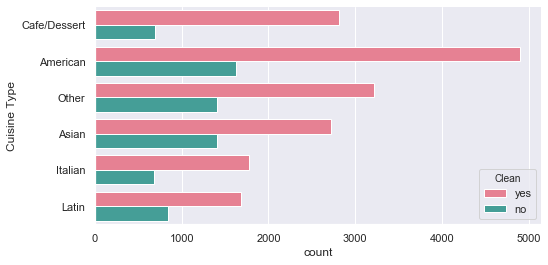

In [84]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(y=dataforplots["Cuisine Type"], hue = dataforplots['Clean'], palette = 'husl')
sns.despine()
#plt.xlim(-.5,6.5) 
plt.savefig('/Users/rabarry/Documents/Insight/NYC data/SafeEats/Cuisine_Violations.png')

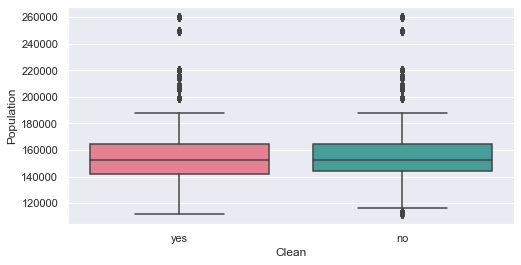

In [87]:
#ax = sns.countplot(y=dataforplots["Cuisine Type"], hue = dataforplots['Clean'], palette = "husl")
#plt.savefig('Cuisine_Countplot.png')
#ax = sns.countplot(y=dataforplots['Borough'], hue = dataforplots['Clean'], palette = "husl")
#plt.savefig('Borough_Countplot.png')
#ax = sns.countplot(y=dataforplots['Previous Inspection Type'], hue = dataforplots['Clean'], palette = "husl")
#plt.savefig('LastType_Countplot.png')

sns.boxplot(y=dataforplots['Population'], x=dataforplots['Clean'], palette = "husl")
#ax = sns.countplot(y=data['Second_Last_Insp_Num_CriticialFlags'], hue = data['is_good_lastInsp'])

#ax = sns.countplot(y=dataforplots['Age of restaurant'], hue = dataforplots['Clean'], palette = 'husl')

#ax = sns.countplot(y=data['ny311_number_of_complaints_3mo'], hue = data['is_good_lastInsp'])

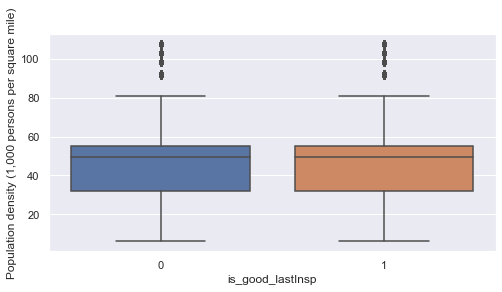

In [86]:
#sns.boxplot(y=data['Insp_Date_Diff'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Income diversity ratio'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Median household income (2018$)'], x=data['is_good_lastInsp'])
sns.boxplot(y=data['Population'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Population density (1,000 persons per square mile)'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Poverty rate'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Public housing (% of rental units)'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Racial diversity index'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Serious crime rate (per 1,000 residents)'], x=data['is_good_lastInsp'])
#sns.boxplot(y=data['Serious housing code violations (per 1,000 privately owned rental units)'], x=data['is_good_lastInsp'])

#### Recode all other categorical variables

In [26]:
data['Second_Last_Insp_Type_CAT']=data['Second_Last_Insp_Type'].astype('category')
data['Second_Last_Insp_Type_CAT'] = data['Second_Last_Insp_Type_CAT'].cat.codes
data['Second_Last_Insp_Num_CriticialFlags_CAT']=data['Second_Last_Insp_Num_CriticialFlags'].astype('category')
data['BORO_CAT']=data['BORO'].astype('category')
data['BORO_CAT'] = data['BORO_CAT'].cat.codes
data['num_years_active_CAT']=data['num_years_active'].astype('category')
data['Cuisine_CAT']=data['Cuisine_Reduced'].astype('category')
data['Cuisine_CAT'] = data['Cuisine_CAT'].cat.codes
data['is_good_lastInsp']= data['is_good_lastInsp'].astype('category')
data['ny311_number_of_complaints_3mo']= data['ny311_number_of_complaints_3mo'].astype('category')

#### Remove restaurants that don't have a previous inspection

In [27]:
len(data);
data = data[data['Second_Last_Insp_Type'].notnull()]
len(data);

#### Format data types 

In [28]:
data['Median household income (2018$)'] = data['Median household income (2018$)'].str[1:]
data['Poverty rate'] = data['Poverty rate'].str[:-1]
data['Public housing (% of rental units)'] = data['Public housing (% of rental units)'].str[:-1]

data = data.swifter.apply(lambda x: x.str.strip() if x.dtype =='object' else x)

data = data.swifter.apply(lambda x: x.str.replace(',','') if x.dtype =='object' else x)

data['Median household income (2018$)'] = data['Median household income (2018$)'].astype('float64')

data['Population'] = data['Population'].astype('float64')
data['Poverty rate'] = data['Poverty rate'].astype('float64')
data['Public housing (% of rental units)'] = data['Public housing (% of rental units)'].astype('float64')

#### Specify the columns that will be included in the model
Also, remove any rows containing NaN

In [29]:
data4model = data[['Insp_Date_Diff', 'ny311_number_of_complaints_3mo',
       'Second_Last_Insp_Type_CAT', 'Second_Last_Insp_Num_CriticialFlags_CAT',
       'BORO_CAT', 'num_years_active_CAT', 'Cuisine_CAT', 'Income diversity ratio', 'Median household income (2018$)',
       'Population', 'Population density (1,000 persons per square mile)',
       'Poverty rate', 'Public housing (% of rental units)',
       'Racial diversity index', 'Serious crime rate (per 1,000 residents)',
       'Serious housing code violations (per 1,000 privately owned rental units)', 'is_good_lastInsp']]
data4model = data4model.dropna()
data4model.shape

(23381, 17)

#### Specify the labels (y data)

In [30]:
Good_y = data4model['is_good_lastInsp']
Good_y = np.ravel(Good_y)
Good_y.shape

(23381,)

#### Specify the features (x data)

In [19]:
Good_x = data4model[['Insp_Date_Diff', 'ny311_number_of_complaints_3mo',
       'Second_Last_Insp_Type_CAT', 'Second_Last_Insp_Num_CriticialFlags_CAT',
       'BORO_CAT', 'num_years_active_CAT', 'Cuisine_CAT', 'Income diversity ratio', 'Median household income (2018$)',
       'Population', 'Population density (1,000 persons per square mile)',
       'Poverty rate', 'Public housing (% of rental units)',
       'Racial diversity index', 'Serious crime rate (per 1,000 residents)',
       'Serious housing code violations (per 1,000 privately owned rental units)']]
Good_x.shape
Good_x.dtypes

(23381, 16)

Insp_Date_Diff                                                               float64
ny311_number_of_complaints_3mo                                              category
Second_Last_Insp_Type_CAT                                                       int8
Second_Last_Insp_Num_CriticialFlags_CAT                                     category
BORO_CAT                                                                        int8
num_years_active_CAT                                                        category
Cuisine_CAT                                                                     int8
Income diversity ratio                                                       float64
Median household income (2018$)                                              float64
Population                                                                   float64
Population density (1,000 persons per square mile)                           float64
Poverty rate                                                     

#### Plot correlation matrix

<Figure size 432x288 with 0 Axes>

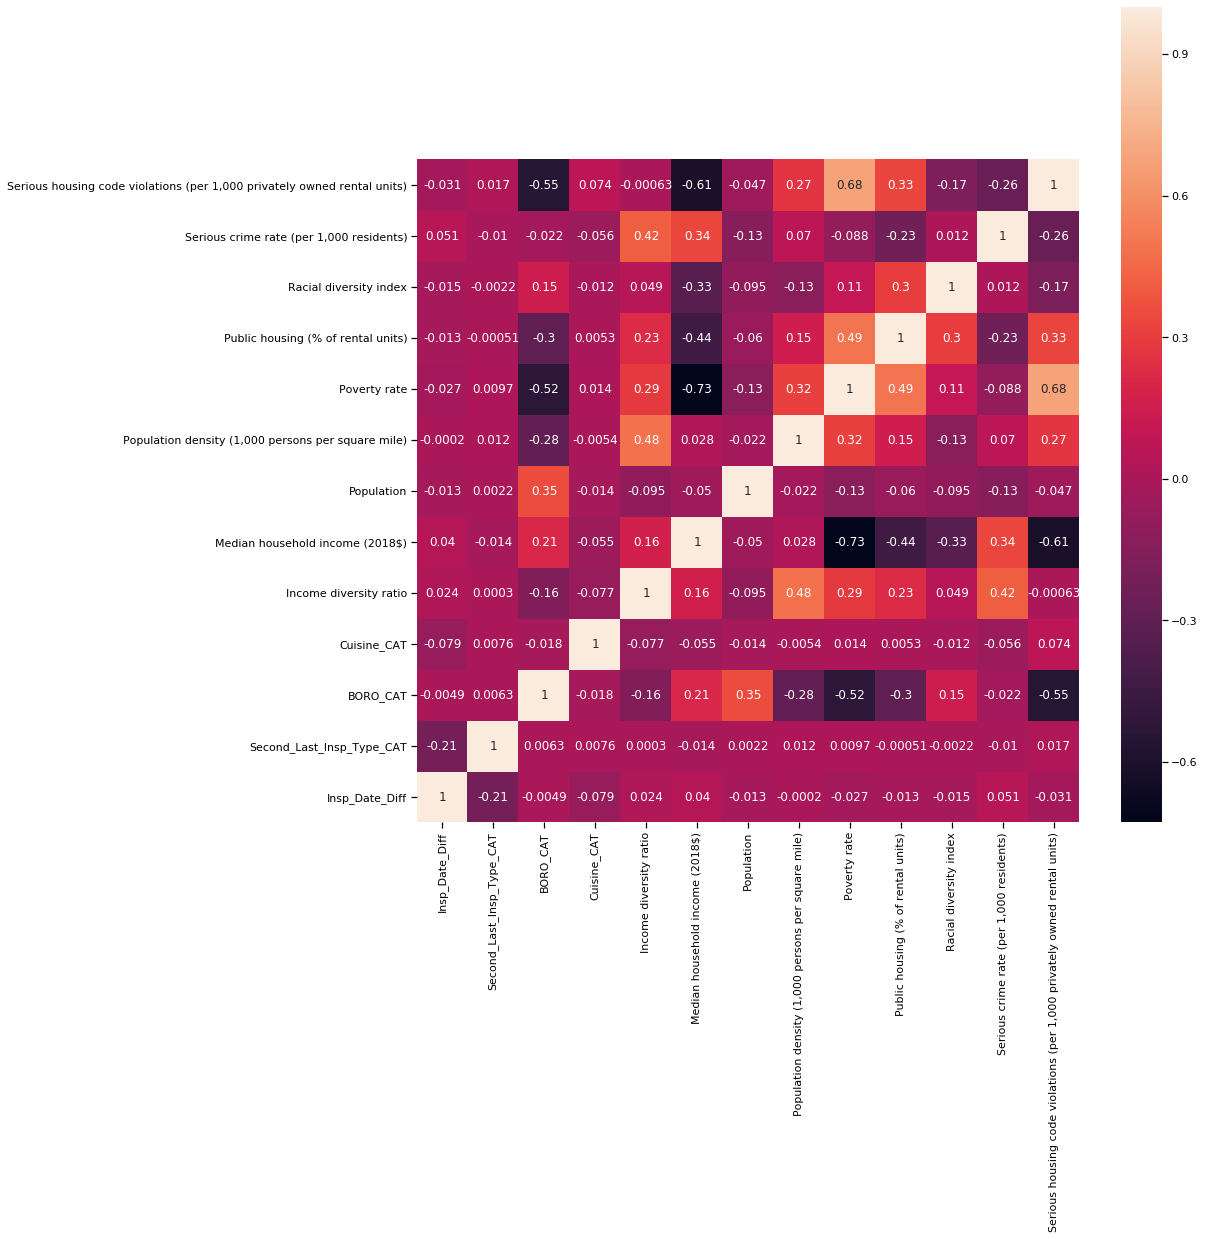

In [20]:
sns.set_context("notebook");
plt.tight_layout();
corr=Good_x.corr();
plt.figure(figsize=(15,15));
g = sns.heatmap(corr, cbar=True, annot=True, square=True)
g.set_ylim(0,16);
#plt.savefig('Correlation_Matrix.png')

#### Train/Test split 70/30

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Good_x, Good_y, test_size=0.30, random_state=123, shuffle = True)

In [22]:
print(f'Size of training features: {x_train.shape}')
print(f'Size of training labels: {y_train.shape}')
print(f'Size of test features: {x_test.shape}')
print(f'Size of test labels: {y_test.shape}')

Size of training features: (16366, 16)
Size of training labels: (16366,)
Size of test features: (7015, 16)
Size of test labels: (7015,)


In [23]:
print('[Num Dirty, Num Clean]')
unique_elements, count_elements = np.unique(y_train, return_counts=True)
print(np.asarray(count_elements))
unique_elements, count_elements = np.unique(y_test, return_counts=True)
print(np.asarray(count_elements))


[Num Dirty, Num Clean]
[ 4583 11783]
[1979 5036]


#### Normalize values to be between 0 and 1

In [24]:
# Normalize continuous variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

#### Resample data to deal with class imbalance

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

# Model1: Logistic regression
### Grid Search used to maximize precision

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression();
grid_values = {'penalty': ['l1', 'l2'], 'C': [.001, .009, .01, .09, 1, 5, 10, 25], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']};
grid_logistic = GridSearchCV(logisticRegr, param_grid = grid_values, scoring = 'precision');
grid_logistic.fit(x_train_res, y_train_res);

#### save best estimator found in grid search

In [34]:
logistic_best = grid_logistic.best_estimator_

# View The Best Parameters
print(f"\033[1m\033[94mBest C: \033[30m{grid_logistic.best_estimator_.get_params()['C']}")
print(f"\033[1m\033[94mBest penalty: \033[30m{grid_logistic.best_estimator_.get_params()['penalty']}")
print(f"\033[1m\033[94mBest solver: \033[30m{grid_logistic.best_estimator_.get_params()['solver']}")


Best C: 0.009
Best penalty: l1
Best solver: saga


#### Generate predictions

In [35]:
predictions_logistic_test = grid_logistic.predict(x_test)

predictions_logistic_train = grid_logistic.predict(x_train_res)

#### Get recall and precision. Precision is most important for my question!!

In [36]:
recall_train = recall_score(y_train_res, predictions_logistic_train)
recall_test = recall_score(y_test, predictions_logistic_test)

print(f'Recall of the TRAINING data is : {recall_train} ')
print(f'Recall of the TEST data is : {recall_test} ')
print('')

precision_train = precision_score(y_train_res, predictions_logistic_train)
precision_test = precision_score(y_test, predictions_logistic_test)

print(f'Precision of the TRAINING data is : {precision_train} ')
print(f'Precision of the TEST data is : {precision_test} ')
print('')

#Make probability predictions
train_prob = grid_logistic.predict_proba(x_train_res)[:,1]
test_prob = grid_logistic.predict_proba(x_test)[:,1]

print(f'Train ROC AUC Score: {roc_auc_score(y_train_res, train_prob)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_prob)}')

Recall of the TRAINING data is : 0.5404396163965034 
Recall of the TEST data is : 0.5329626687847498 

Precision of the TRAINING data is : 0.606129830573006 
Precision of the TEST data is : 0.7898763978811065 

Train ROC AUC Score: 0.6222220854531824
Test ROC AUC  Score: 0.6208431180292195


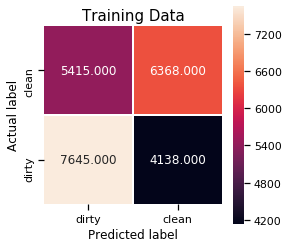

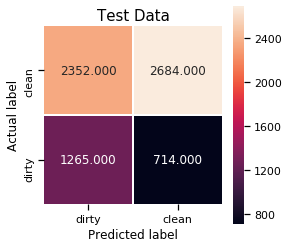

In [37]:
sns.set_context('notebook');
Outcome = ['dirty', 'clean'];
cm = metrics.confusion_matrix(y_train_res, predictions_logistic_train);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);
#plt.savefig('Confusion_Matrix.png')


cm = metrics.confusion_matrix(y_test, predictions_logistic_test);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);

In [121]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions_logistic_test)
print(cnf_matrix)

FP = cnf_matrix[0,1]
TN = cnf_matrix[0,0]

FP = FP.astype(float)
TN = TN.astype(float)

# Fall out or false positive rate
log_FPR = FP/(FP+TN)
print(f"\033[1m\033[94mLogistic False Positive Rate: \033[30m{log_FPR}")

[[1265  714]
 [2352 2684]]
Logistic False Positive Rate: 0.36078827690752907


# Model 2: Decision Tree
### Grid search to optimize precision

In [38]:
#Import Model
from sklearn.tree import DecisionTreeClassifier

#Instantiate model with default parameters
tree = DecisionTreeClassifier()

# Create a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2,4,6,8,12],
              'min_samples_split': range(10,500,20) }


# Create a grid search object
grid_decision_tree = GridSearchCV(tree, parameters)

# Fit the grid search
grid_decision_tree.fit(x_train_res, y_train_res)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

#### save best estimator found in grid search

In [39]:
decision_tree_best = grid_decision_tree.best_estimator_

# View The Best Parameters
print(f"\033[1m\033[94mBest Criterion: \033[30m{grid_decision_tree.best_estimator_.get_params()['criterion']}")
print(f"\033[1m\033[94mBest max_depth: \033[30m{grid_decision_tree.best_estimator_.get_params()['max_depth']}")
print(f"\033[1m\033[94mBest min_samples_split: \033[30m{grid_decision_tree.best_estimator_.get_params()['min_samples_split']}")

Best Criterion: entropy
Best max_depth: 12
Best min_samples_split: 30


#### Generate predictions

In [40]:
predictions_DT_test = grid_decision_tree.predict(x_test)

predictions_DT_train = grid_decision_tree.predict(x_train_res)

In [41]:
recall_train = recall_score(y_train_res, predictions_DT_train)
recall_test = recall_score(y_test, predictions_DT_test)

print(f'Recall of the TRAINING data is : {recall_train} ')
print(f'Recall of the TEST data is : {recall_test} % \n')

precision_train = precision_score(y_train_res, predictions_DT_train)
precision_test = precision_score(y_test, predictions_DT_test)

print(f'Precision of the TRAINING data is : {precision_train} ')
print(f'Precision of the TEST data is : {precision_test} % \n')

#Make probability predictions
train_prob = grid_decision_tree.predict_proba(x_train)[:,1]
test_prob = grid_decision_tree.predict_proba(x_test)[:,1]

print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_prob)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_prob)}')

Recall of the TRAINING data is : 0.7953831791564118 
Recall of the TEST data is : 0.7527799841143765 % 

Precision of the TRAINING data is : 0.7137852246763138 
Precision of the TEST data is : 0.7560829676904667 % 

Train ROC AUC Score: 0.7110477546276547
Test ROC AUC  Score: 0.5968573516763186


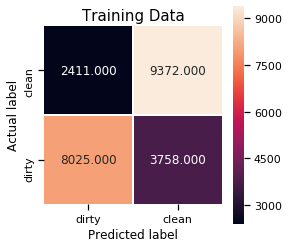

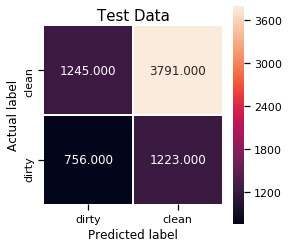

In [42]:
Outcome = ['dirty', 'clean'];
cm = metrics.confusion_matrix(y_train_res, predictions_DT_train);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);
#plt.savefig('Confusion_Matrix.png')


cm = metrics.confusion_matrix(y_test, predictions_DT_test);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);

In [120]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, predictions_DT_test)
print(cnf_matrix)

FP = cnf_matrix[0,1]
TN = cnf_matrix[0,0]

FP = FP.astype(float)
TN = TN.astype(float)

# Fall out or false positive rate
dt_FPR = FP/(FP+TN)
print(f"\033[1m\033[94mDecision Tree False Positive Rate: \033[30m{dt_FPR}")

[[ 756 1223]
 [1245 3791]]
Decision Tree False Positive Rate: 0.617988883274381


# Model 3: random forest
#### First, use a grid search to find best hyperparameters

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15, 20, 25],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [6, 8, 10, 12],
    'n_estimators': [1200, 1500, 1800, 2000]
}
# Create a based model
RandForest = RandomForestClassifier()

# Instantiate the grid search model
RF_grid_search = GridSearchCV(estimator = RandForest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring = 'precision')

RF_grid_search.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 115.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

#### save best estimator found in grid search

In [50]:
RF_best = RF_grid_search.best_estimator_

# View The Best Parameters
print(f"\033[1m\033[94mBest max_depth: \033[30m{RF_grid_search.best_estimator_.get_params()['max_depth']}")
print(f"\033[1m\033[94mBest min_samples_split: \033[30m{RF_grid_search.best_estimator_.get_params()['min_samples_split']}")
print(f"\033[1m\033[94mBest min_samples_leaf: \033[30m{RF_grid_search.best_estimator_.get_params()['min_samples_leaf']}")
print(f"\033[1m\033[94mBest n_estimators: \033[30m{RF_grid_search.best_estimator_.get_params()['n_estimators']}")

Best max_depth: 25
Best min_samples_split: 6
Best min_samples_leaf: 1
Best n_estimators: 2000


In [51]:
#Make predictions on the test and training data
RandForest_predict_test = RF_grid_search.predict(x_test)
RandForest_predict_train = RF_grid_search.predict(x_train_res)

recall_test = recall_score(y_test, RandForest_predict_test);
recall_train = recall_score(y_train_res, RandForest_predict_train);

print(f'Recall of the training data is : {recall_train}')
print(f'Recall of the test data is : {recall_test} \n')

precision_test = precision_score(y_test, RandForest_predict_test)
precision_train = precision_score(y_train_res, RandForest_predict_train)

print(f'Precision of the training data is: {precision_train}')
print(f'Precision of the test data is: {precision_test}  \n')


Recall of the training data is : 0.9623185945854197
Recall of the test data is : 0.7964654487688642 

Precision of the training data is: 0.916579096273543
Precision of the test data is: 0.7418161642315517  



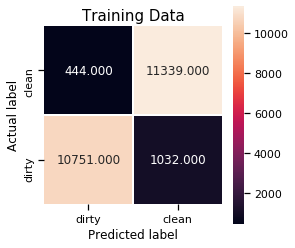

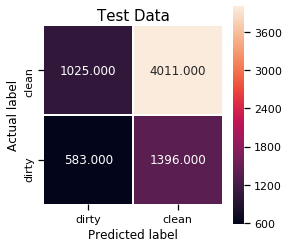

In [52]:
Outcome = ['dirty', 'clean'];
cm = metrics.confusion_matrix(y_train_res, RandForest_predict_train);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);
#plt.savefig('Confusion_Matrix.png')


cm = metrics.confusion_matrix(y_test, RandForest_predict_test);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);

In [119]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, RandForest_predict_test)
print(cnf_matrix)

FP = cnf_matrix[0,1]
TN = cnf_matrix[0,0]

FP = FP.astype(float)
TN = TN.astype(float)

# Fall out or false positive rate
rf_FPR = FP/(FP+TN)
print(f"\033[1m\033[94mRF False Positive Rate: \033[30m{rf_FPR}")

[[ 583 1396]
 [1025 4011]]
RF False Positive Rate: 0.7054067710965134


# Model 4: K nearest neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

#create a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': [10, 20]}

#use gridsearch to test all values for n_neighbors
knn_grid = GridSearchCV(knn, params_knn, cv=5, n_jobs=4, scoring = 'precision')

#fit model to resampled training data
knn_grid.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4, param_grid={'n_neighbors': [10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [100]:
#save the best model
knn_best = knn_grid.best_estimator_

print(knn_grid.best_params_)

{'n_neighbors': 10}


In [129]:
#Make predictions on the test data
knn_predictions = knn_best.predict(x_test)
knn_predictions_train = knn_best.predict(x_train_res)

#Get probabilities for each class
knn_probs_train = knn_best.predict_proba(x_train_res)[:,1]
knn_probs_test = knn_best.predict_proba(x_test)[:,1]

In [130]:
recall_test = recall_score(y_test, knn_predictions);
recall_train = recall_score(y_train_res, knn_predictions_train);

print(f'Recall of the training data is : {recall_train}')
print(f'Recall of the test data is : {recall_test} \n')
precision_test = precision_score(y_test, knn_predictions)
precision_train = precision_score(y_train_res, knn_predictions_train)

print(f'Precision of the training data is: {precision_train}')
print(f'Precision of the test data is: {precision_test} \n')
from sklearn.metrics import roc_auc_score

#Calculate roc auc
roc_value_train = roc_auc_score(y_train_res, knn_probs_train)
roc_value_test = roc_auc_score(y_test, knn_probs_test)
print(f'ROC AUC of the training data is: {roc_value_train}')
print(f'ROC AUC of the test data is: {roc_value_test}')

Recall of the training data is : 0.5860986166511075
Recall of the test data is : 0.4970214455917395 

Precision of the training data is: 0.7975516803326019
Precision of the test data is: 0.7689708141321044 

ROC AUC of the training data is: 0.8125675543722417
ROC AUC of the test data is: 0.5788916065069248


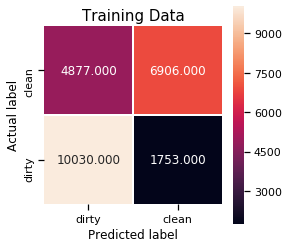

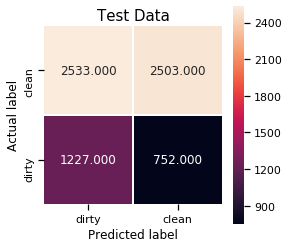

In [103]:
Outcome = ['dirty', 'clean'];
cm = metrics.confusion_matrix(y_train_res, knn_predictions_train);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);
#plt.savefig('Confusion_Matrix.png')


cm = metrics.confusion_matrix(y_test, knn_predictions);
plt.figure(figsize=(4,4));
g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
           xticklabels=Outcome,
           yticklabels=Outcome);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Data';
plt.title(all_sample_title, size = 15);
g.set_ylim(0,2);

In [114]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, knn_predictions)
print(cnf_matrix)

FP = cnf_matrix[0,1]
TN = cnf_matrix[0,0]

FP = FP.astype(float)
TN = TN.astype(float)

# Fall out or false positive rate
knn_FPR = FP/(FP+TN)
print(f"\033[1m\033[94mknn False Positive Rate: \033[30m{knn_FPR}")

[[1227  752]
 [2533 2503]]
knn False Positive Rate: 0.3799898938858009


In [131]:
import pickle
from sklearn.externals import joblib
joblib.dump(knn_best, 'knn_model.pkl')
knn_from_pickle = joblib.load('knn_model.pkl')
knn_from_pickle.predict(x_test)

['knn_model.pkl']

array([0, 0, 1, ..., 0, 0, 0])

# Ensemble

In [123]:
print('knn Precision: {}'.format(precision_score(y_test, knn_predictions)))
print('knn False Positive Rate: {} \n'.format(knn_FPR))

print('random forest Precision: {}'.format(precision_score(y_test, RandForest_predict_test)))
print('random forest False Positive Rate: {} \n'.format(rf_FPR))

print('logistic regression Precision: {}'.format(precision_score(y_test, predictions_logistic_test)))
print('logistic regression False Positive Rate: {} \n'.format(log_FPR))

knn Precision: 0.7689708141321044
knn False Positive Rate: 0.3799898938858009 

random forest Precision: 0.7418161642315517
random forest False Positive Rate: 0.7054067710965134 

logistic regression Precision: 0.7898763978811065
logistic regression False Positive Rate: 0.36078827690752907 



#### Build voting classifier

In [125]:
from sklearn.ensemble import VotingClassifier

# create a dictionary of our models
estimators = [('knn', knn_best), ('RandForest', RF_best), ('logistic_reg', logistic_best)]

#create our voting classifier
ensemble = VotingClassifier(estimators, voting='hard')

In [126]:
#fit model to training data
ensemble.fit(x_train_res, y_train_res)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='uniform')),
                             ('RandForest',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=25,
                                                     max_features='auto',
                                                     max_leaf_nod

In [127]:
#Make predictions on the test data
ensemble_predict_test = ensemble.predict(x_test)
ensemble_predict_train = ensemble.predict(x_train_res)

In [128]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, ensemble_predict_test)
print(cnf_matrix)

FP = cnf_matrix[0,1]
TN = cnf_matrix[0,0]
TP = cnf_matrix[1,1]

FP = FP.astype(float)
TN = TN.astype(float)
TP = TP.astype(float)

# Fall out or false positive rate
ensemble_Precision = TP/(TP+FP)
ensemble_FPR = FP/(FP+TN)
print(f"\033[1m\033[94mEnsemble False Positive Rate: \033[30m{ensemble_Precision} \n")
print(f"\033[1m\033[94mEnsemble False Positive Rate: \033[30m{ensemble_FPR}")

[[1036  943]
 [1917 3119]]
Ensemble False Positive Rate: 0.7678483505662236 

Ensemble False Positive Rate: 0.4765032844871147
